In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inlines

In [54]:
df = pd.read_csv(r"G:\Udemy\DATA SCIENCE ineuron\Resources\6_Oct_22\googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Question to ask from this dataset
- Q1. Can we segreate the cat and num features?
- Q2. Check distribution for numerical features
- Q3. Which one will be a most popular category?
- Q4. Top 10 most popular category ?
- Q5. Which Category have the largest number of installation ?
- Q6. How many apps are there on google play store which get 5 ratings?
- Q7. Does size of the application has any impact on the popularity ?
- Q8. Which kind of app user are downloading the most free / paid ?

In [3]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3594,BookBaby - Baby Development,PARENTING,4.6,1002,5.0M,"50,000+",Free,0,Everyone,Parenting,"August 18, 2016",3.0,4.0.3 and up
3585,Learning English for children,PARENTING,NaN,67,15M,"50,000+",Free,0,Everyone,Parenting;Education,"April 18, 2018",1.9,2.3 and up
8783,Super Dr. Parking 3D,FAMILY,4.0,4518,41M,"1,000,000+",Free,0,Everyone,Simulation,"December 17, 2017",3.3,4.1 and up
1155,Simple - Better Banking,FINANCE,4.4,7731,24M,"100,000+",Free,0,Everyone,Finance,"August 2, 2018",2.53.2,5.0 and up
2034,Baby Panda Care,FAMILY,4.2,108795,49M,"10,000,000+",Free,0,Everyone,Educational;Pretend Play,"June 15, 2018",8.25.10.00,4.0.3 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(10841, 13)

In [7]:
df[df.duplicated()][:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up


## Data Cleaning

In [8]:
# total there are 10841 rows in Reviews Column

df['Reviews'].shape

(10841,)

In [9]:
# If we check isnumeric(), then we find that out of 10841 rows, 10840 rows are numeric() and 1 row is string

df.Reviews.str.isnumeric().sum()

10840

In [10]:
df['Reviews'].str.isnumeric()

0        True
1        True
2        True
3        True
4        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: Reviews, Length: 10841, dtype: bool

In [11]:
~df['Reviews'].str.isnumeric()        # When we use ~ sign then it shows inverse of the result means False inplace of true
                                      # and true in place of false

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: Reviews, Length: 10841, dtype: bool

In [12]:
df[~df['Reviews'].str.isnumeric()]                  #  this is the result where Reviews is 3.0M means string

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
 # Copy the original Df to Df_copy variable
    
df_copy = df.copy()                   

In [14]:
 # Delete that row where Reviews is 3.0M

df_copy.drop(df[~df['Reviews'].str.isnumeric()].index,inplace=True)       

In [15]:
df_copy[10470:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [16]:
df['Reviews'].dtype

dtype('O')

In [17]:
# Change dtype of Reviews column from Object to int

df_copy['Reviews'] = df_copy['Reviews'].astype(int)

#### Convert Size MB to KB

In [18]:
df_copy.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [19]:
df_copy['Size'] = (df_copy['Size'].str.replace('M','000'))

In [20]:
df_copy['Size'] = df_copy['Size'].str.replace('k','')

In [21]:
df_copy['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'Varies with device', '9.4000', '15000', '10000',
       '1.2000', '26000', '8.0000', '7.9000', '56000', '57000', '35000',
       '54000', '201', '3.6000', '5.7000', '8.6000', '2.4000', '27000',
       '2.5000', '16000', '3.4000', '8.9000', '3.9000', '2.9000', '38000',
       '32000', '5.4000', '18000', '1.1000', '2.2000', '4.5000', '9.8000',
       '52000', '9.0000', '6.7000', '30000', '2.6000', '7.1000', '3.7000',
       '22000', '7.4000', '6.4000', '3.2000', '8.2000', '9.9000',
       '4.9000', '9.5000', '5.0000', '5.9000', '13000', '73000', '6.8000',
       '3.5000', '4.0000', '2.3000', '7.2000', '2.1000', '42000',
       '7.3000', '9.1000', '55000', '23', '6.5000', '1.5000', '7

- Here all values of size is converted into number
- But there is one "Varies with device" value, which we have to replace with np.nan

In [22]:
import numpy as np

In [23]:
# Replace "Varies with device" with nan value

df_copy['Size'] = df_copy['Size'].str.replace('Varies with device', str(np.nan))

In [24]:
df_copy['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'nan', '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000'

In [25]:
# Change dtype of Size Column to float

df_copy['Size'] = df_copy['Size'].astype(float)

In [26]:
df_copy['Size'][2]*1000

8700.0

In [27]:
for i in df_copy['Size']:
    if i < 10:
        df_copy['Size']= df_copy['Size'].replace(i,i*1000)

In [28]:
df_copy['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+03, 5.50e+03, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+03, 7.00e+03, 2.30e+04, 6.00e+03, 6.10e+03,
       4.60e+03, 9.20e+03, 5.20e+03, 1.10e+04, 2.40e+04,      nan,
       9.40e+03, 1.50e+04, 1.00e+04, 1.20e+03, 2.60e+04, 8.00e+03,
       7.90e+03, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+03, 5.70e+03, 8.60e+03, 2.40e+03, 2.70e+04, 2.50e+03,
       1.60e+04, 3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04,
       3.20e+04, 5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03,
       9.80e+03, 5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03,
       7.10e+03, 3.70e+03, 2.20e+04, 7.40e+03, 6.40e+03, 3.20e+03,
       8.20e+03, 9.90e+03, 4.90e+03, 9.50e+03, 5.00e+03, 5.90e+03,
       1.30e+04, 7.30e+04, 6.80e+03, 3.50e+03, 4.00e+03, 2.30e+03,
       7.20e+03, 2.10e+03, 4.20e+04, 7.30e+03, 9.10e+03, 5.50e

In [29]:
df_copy['Size'] = df_copy['Size']/1000

In [30]:
df_copy['Size'][9004:9018]

9004     3.000
9005     2.200
9006     4.200
9007    16.000
9008     1.500
9009       NaN
9010     0.500
9011     3.400
9012     3.300
9013    13.000
9014     2.500
9015    10.000
9016     3.000
9017     0.054
Name: Size, dtype: float64

### Remove the coma and + sign from Installs Column

In [31]:
df_copy['Installs'].unique()    

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

### Remove $ sign from Price Column

In [32]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [33]:
chars_to_remove = ['+',',','$']
cols_to_clean = ['Installs','Price']

for item in chars_to_remove:
    for col in cols_to_clean:
        df_copy[col] = df_copy[col].str.replace(item,"")

In [34]:
# coma and + sign removed from Installs Column

df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [35]:
# $ sign removed from Price Column

df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [36]:
# Change dtype of Installs columns to int

df_copy['Installs'] = df_copy['Installs'].astype('int')

In [37]:
# Change dtype of Price columns to int

df_copy['Price'] = df_copy['Price'].astype('float')

### Convert Last Updates Column to date time

In [38]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [39]:
df_copy.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

### Extract Day, month, year from Last Updated Column

In [40]:
df_copy['Day'] = df_copy['Last Updated'].dt.day

In [41]:
df_copy['Month'] = df_copy['Last Updated'].dt.month

In [42]:
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [43]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


## Save the cleaned data to CSV

In [94]:
df_copy.to_csv('google_play_store_cleaned.csv', index = False)

In [97]:
pd.read_csv(r"google_play_store_cleaned.csv").head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [2]:
df1 = pd.read_csv(r"google_play_store_cleaned.csv")

In [3]:
# Check the null value
missing_value = df1.isna().sum()

In [4]:
missing_value[missing_value != 0]

Rating         1474
Size           1695
Type              1
Current Ver       8
Android Ver       2
dtype: int64

In [5]:
df1.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10840,9659,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10840,33,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9366.0,NaN,NaN,NaN,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0
Reviews,10840.0,NaN,NaN,NaN,444152.896033,2927760.603886,0.0,38.0,2094.0,54775.5,78158306.0
Size,9145.0,NaN,NaN,NaN,21.506534,22.596021,0.01,4.9,13.0,30.0,100.0
Installs,10840.0,NaN,NaN,NaN,15464338.882565,85029361.395467,0.0,1000.0,100000.0,5000000.0,1000000000.0
Type,10839,2,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10840.0,NaN,NaN,NaN,1.027368,15.949703,0.0,0.0,0.0,0.0,400.0
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10840,119,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1[df1.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,1,6,2018


In [7]:
# Drop all duplicate values
df1.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [8]:
df1.shape

(10840, 16)

In [9]:
df1 = df1.drop_duplicates()
df1.shape

(10357, 16)

## Question from this Dataset

### Q1. Can we segreate the cat and num features?

In [10]:
numerical_feature = [fea for fea in df1.columns if df1[fea].dtype != "O"]
categorical_feature = [fea for fea in df1.columns if df1[fea].dtype == "O"]

In [11]:
categorical_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [12]:
numerical_feature

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

In [149]:
df1['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9659, dtype: int64

In [155]:
# If we use normalize = True, then it will show counts in the percentage
df1['App'].value_counts(normalize= True) * 100

ROBLOX                                           0.086898
8 Ball Pool                                      0.067587
Bubble Shooter                                   0.057932
Helix Jump                                       0.057932
Zombie Catchers                                  0.057932
                                                   ...   
Popsicle Launcher for Android P 9.0 launcher     0.009655
PixelLab - Text on pictures                      0.009655
P Launcher for Android™ 9.0                      0.009655
Pacify (Android P theme) - Theme for Xperia™     0.009655
iHoroscope - 2018 Daily Horoscope & Astrology    0.009655
Name: App, Length: 9659, dtype: float64

In [148]:
len(df1['App'].value_counts())

9659

### Q2. Check distribution for numerical features

In [13]:
num_df = df1[numerical_feature]

In [14]:
cat_df = df1[categorical_feature]

In [15]:
num_df

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018
...,...,...,...,...,...,...,...,...
10835,4.5,38,53.0,5000,0.0,25,7,2017
10836,5.0,4,3.6,100,0.0,6,7,2018
10837,NaN,3,9.5,1000,0.0,20,1,2017
10838,4.5,114,NaN,1000,0.0,19,1,2015


<AxesSubplot:xlabel='Rating', ylabel='Density'>

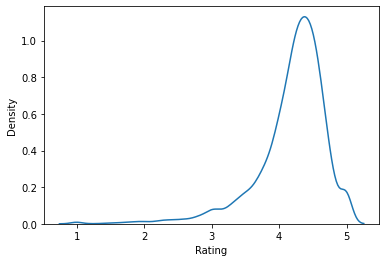

In [16]:
# Check the distribution of numberical feature "Rating"
sns.kdeplot(num_df['Rating'])

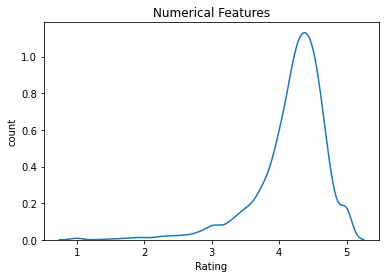

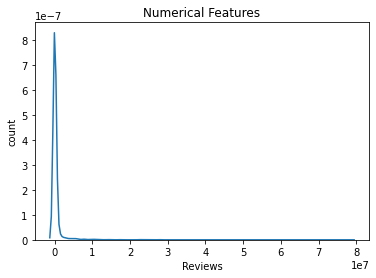

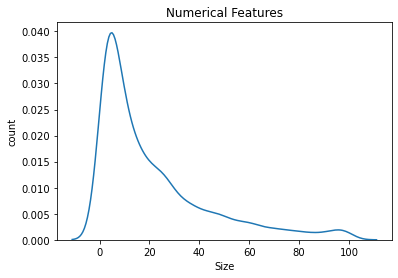

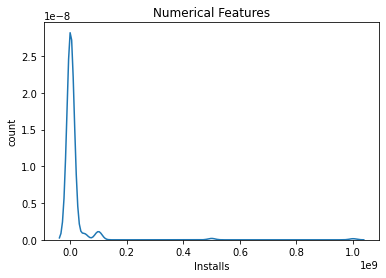

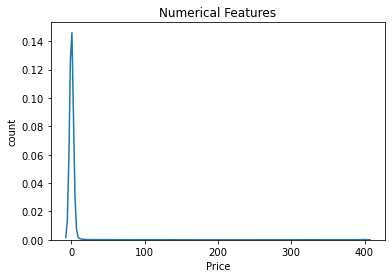

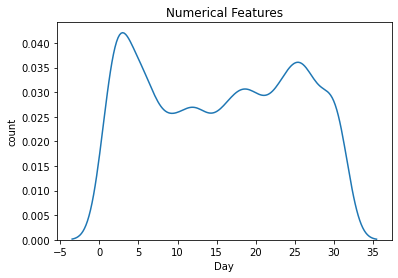

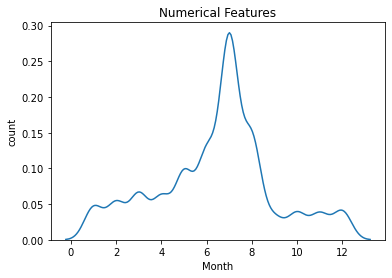

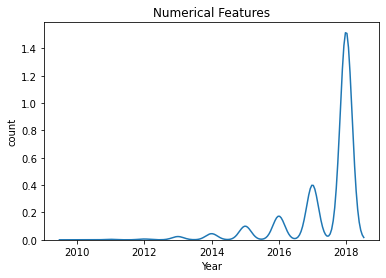

In [174]:
# See the distribution of each and every feature

for feature in numerical_feature:
    sns.kdeplot(num_df[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title('Numerical Features')
    plt.show()

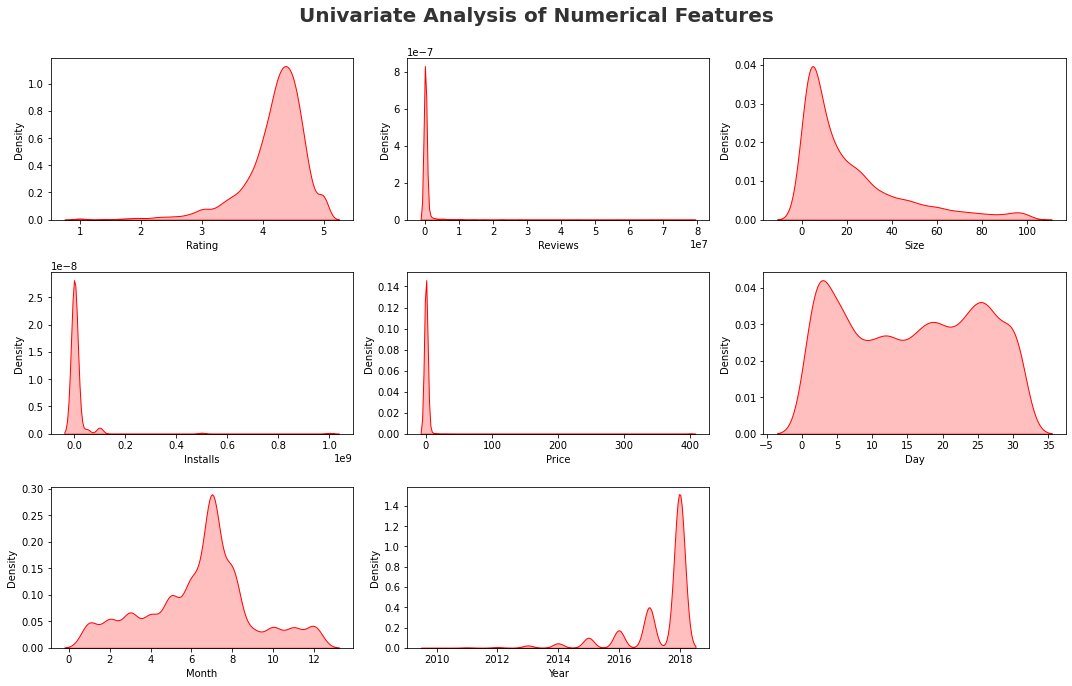

In [16]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = df1[numerical_feature[i]], shade =True, color='r')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

#### Observation
- Rating and Year are the left skewed data
- Reviews , Size , Installs and Price are the right skewed data

In [17]:
categorical_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [18]:
cat_df['Type'].value_counts()

Free    9591
Paid     765
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

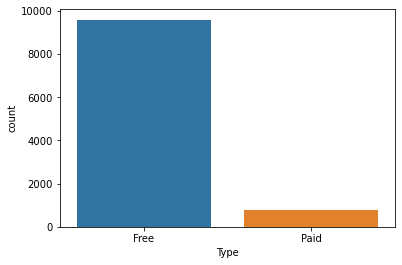

In [19]:
sns.countplot(cat_df['Type'])

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

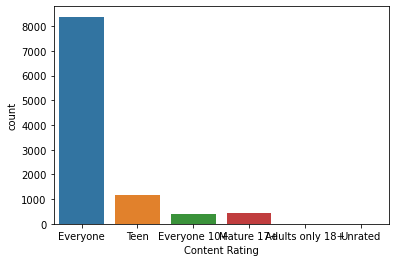

In [25]:
sns.countplot(cat_df['Content Rating'])

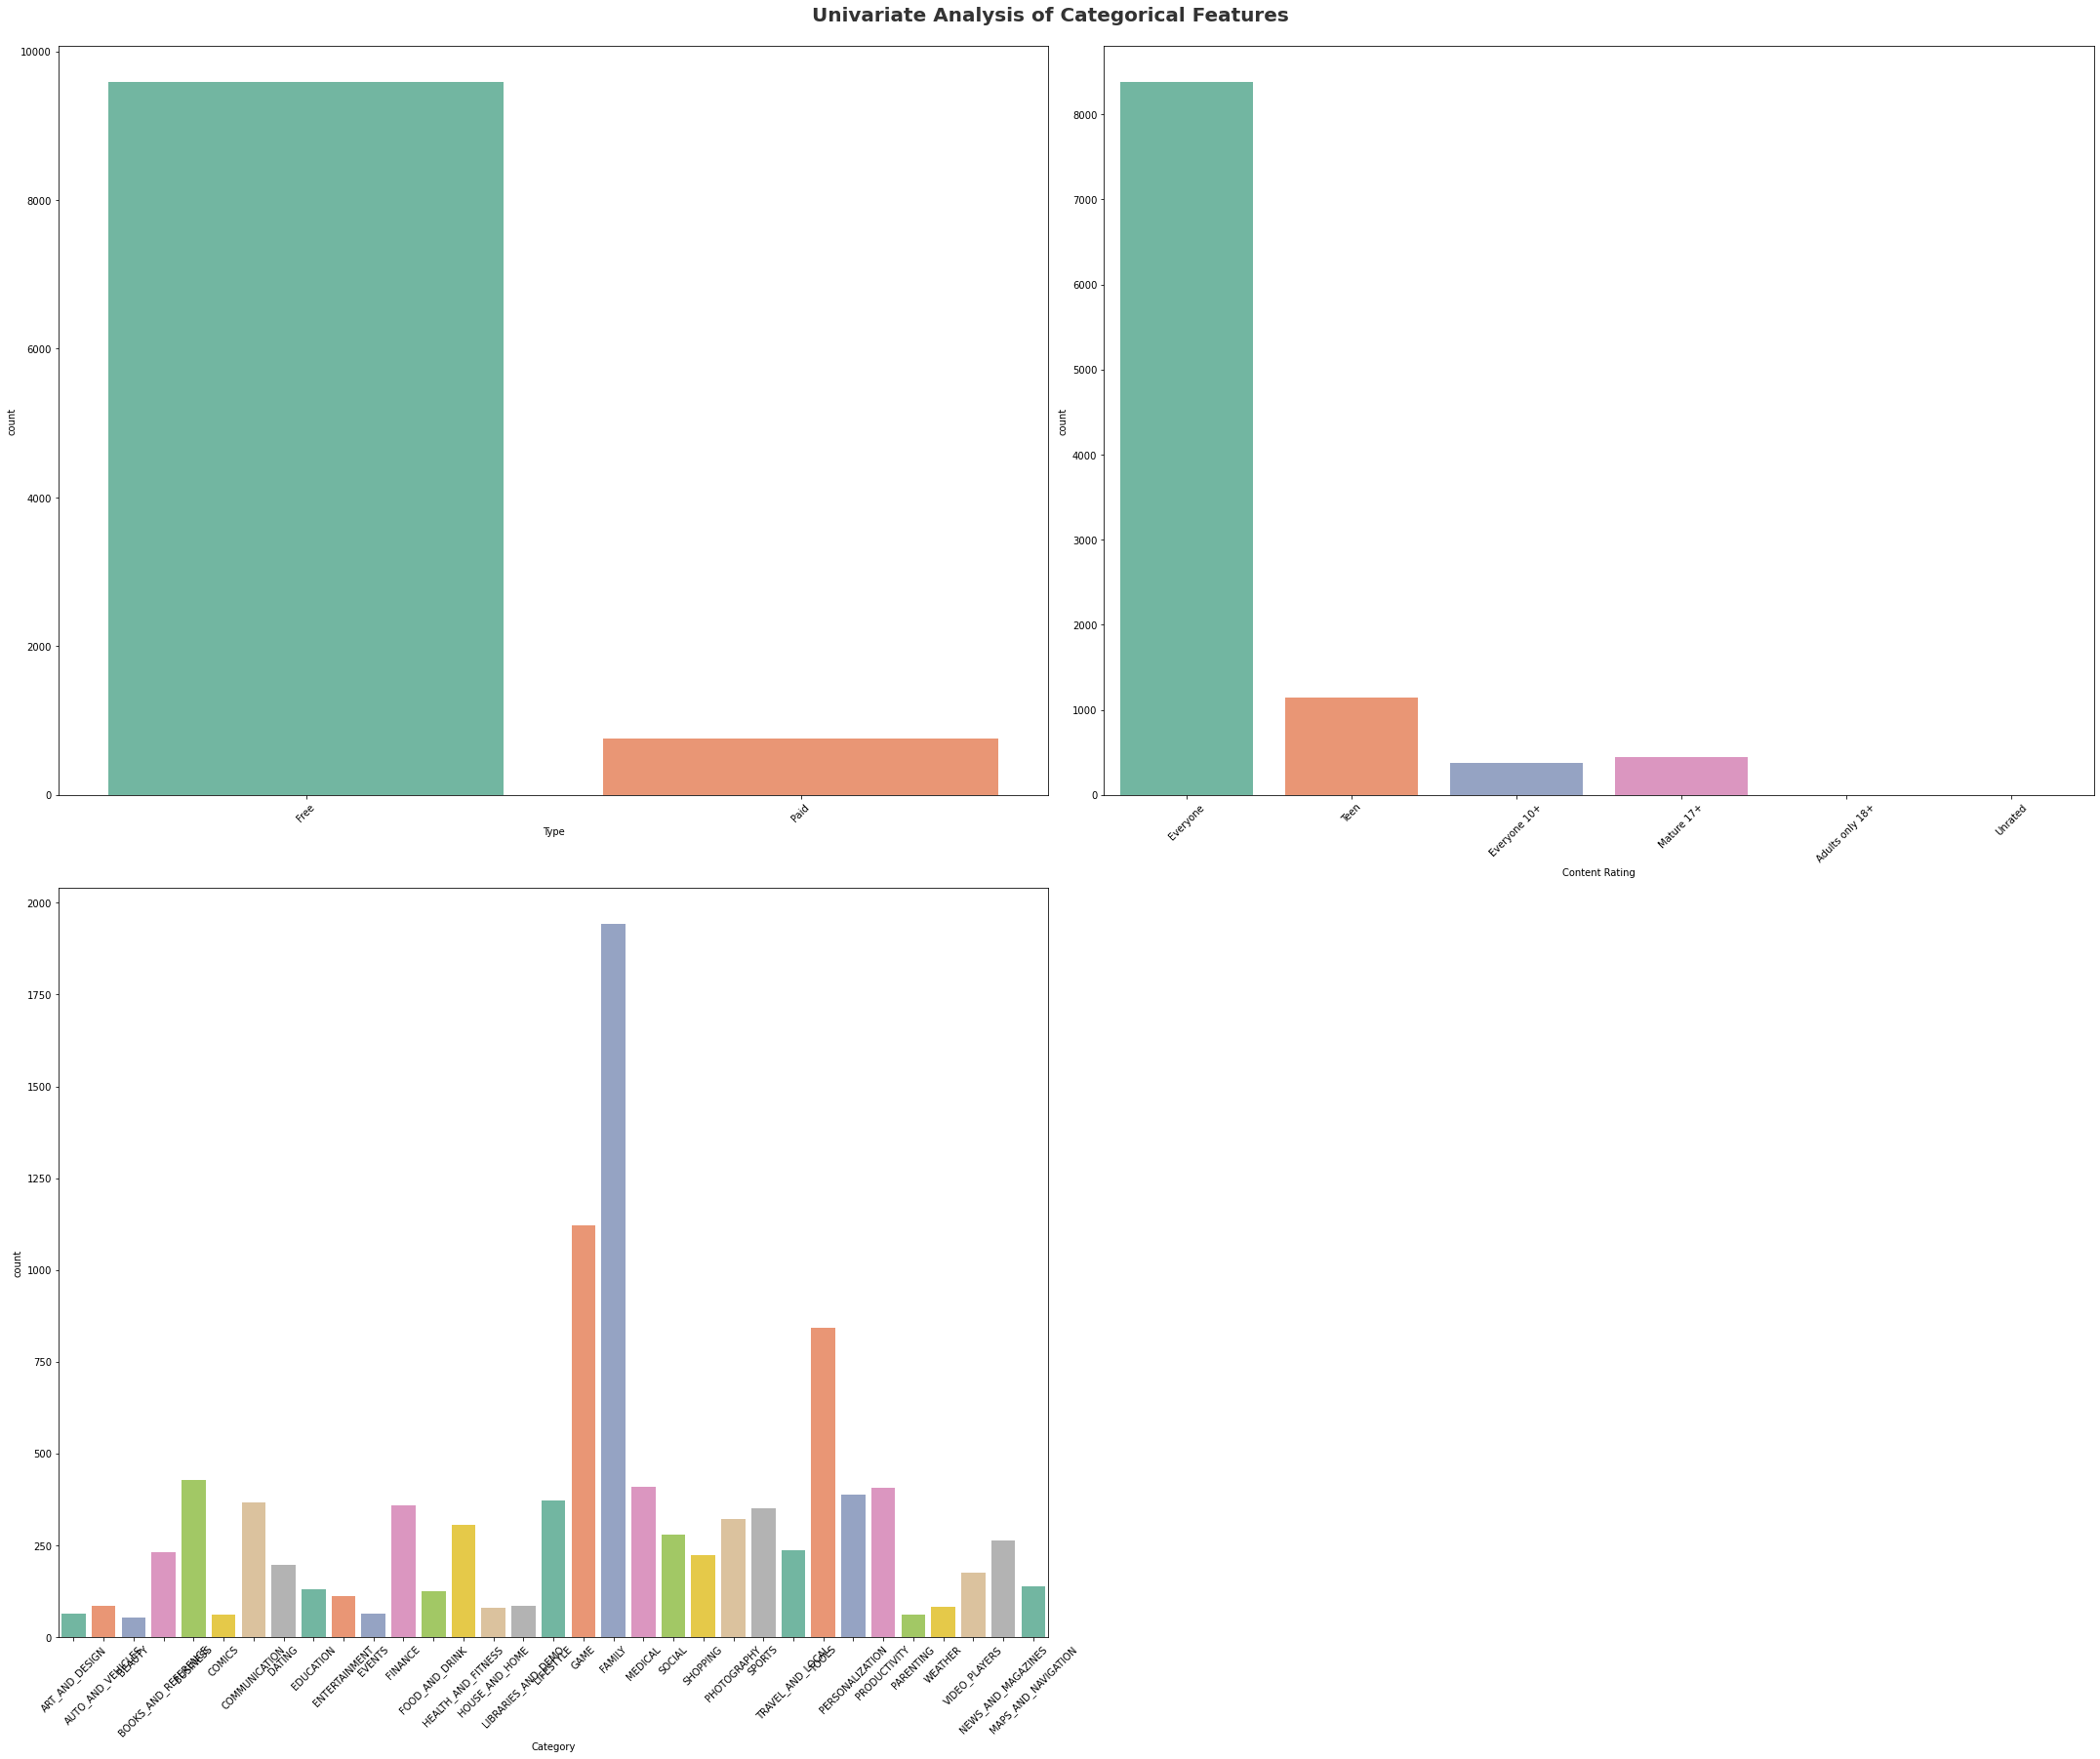

In [35]:
# Categorical Columns
plt.figure(figsize = (30,25))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1.)
category = ['Type', 'Content Rating', 'Category']

for i in range(0, len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x = df1[category[i]], palette = "Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

## Q3. Which one will be a most popular category

In [32]:
cat_df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

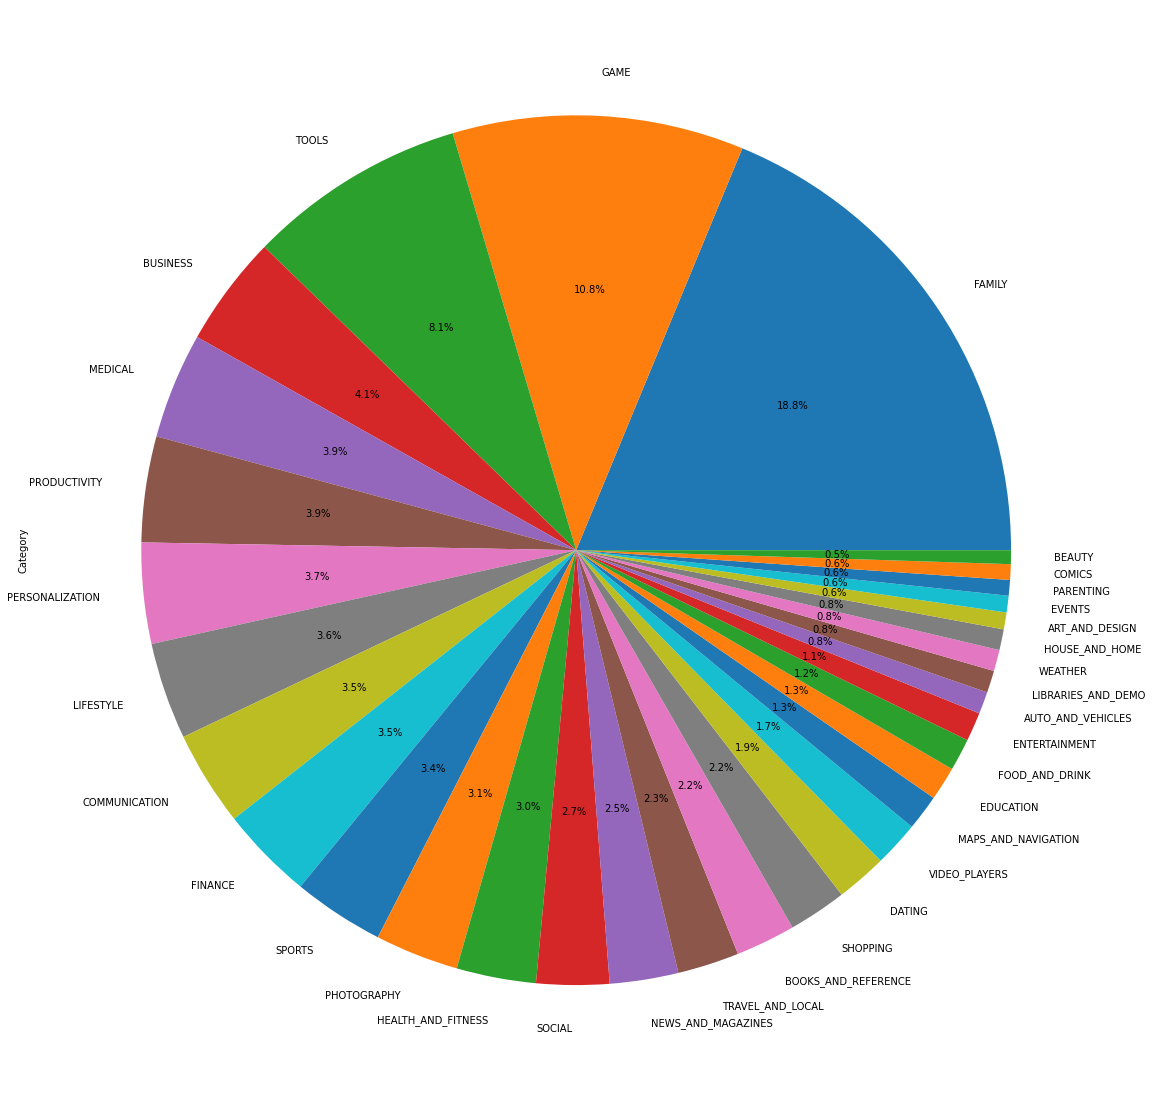

In [38]:
# Plot the piechart
# Auto percentage = autopct = '%1.1f%%' 
cat_df['Category'].value_counts().plot.pie(figsize = (20,20),autopct = '%1.1f%%')

## Q4. Top 10 most popular category

In [43]:
top_10_cat = cat_df['Category'].value_counts()[:10]
top_10_cat

FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: Category, dtype: int64

<AxesSubplot:>

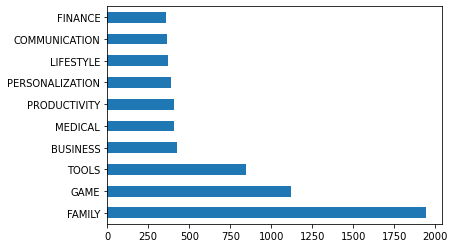

In [47]:
top_10_cat.plot(kind = "barh")

In [55]:
# convert top_10_cat to Dataframe
category = pd.DataFrame(top_10_cat)

In [61]:
category.head(2)

,Count
FAMILY,1943
GAME,1121


In [57]:
# Change column name from category to count
category.rename(columns={"Category":"Count"}, inplace = True)

In [58]:
category.head(10)

,Count
FAMILY,1943
GAME,1121
TOOLS,843
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,388
LIFESTYLE,373
COMMUNICATION,366
FINANCE,360


<AxesSubplot:ylabel='Count'>

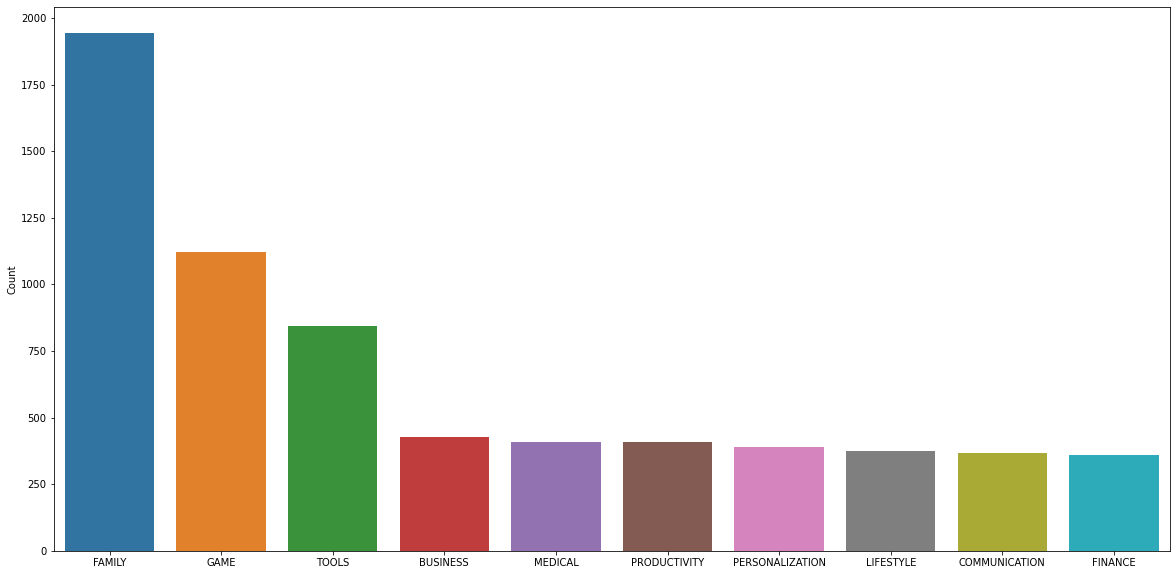

In [64]:
# Plot barplot 
plt.figure(figsize = (20,10))
sns.barplot(x = category.index[:10], y = "Count", data = category[:10])

## Q5. Which Category have the largest number of installation

In [76]:
larg_inst = df1.groupby('Category')['Installs'].sum().sort_values(ascending = False)
larg_inst[:10]

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452771915
FAMILY                10041692505
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

<AxesSubplot:xlabel='Category'>

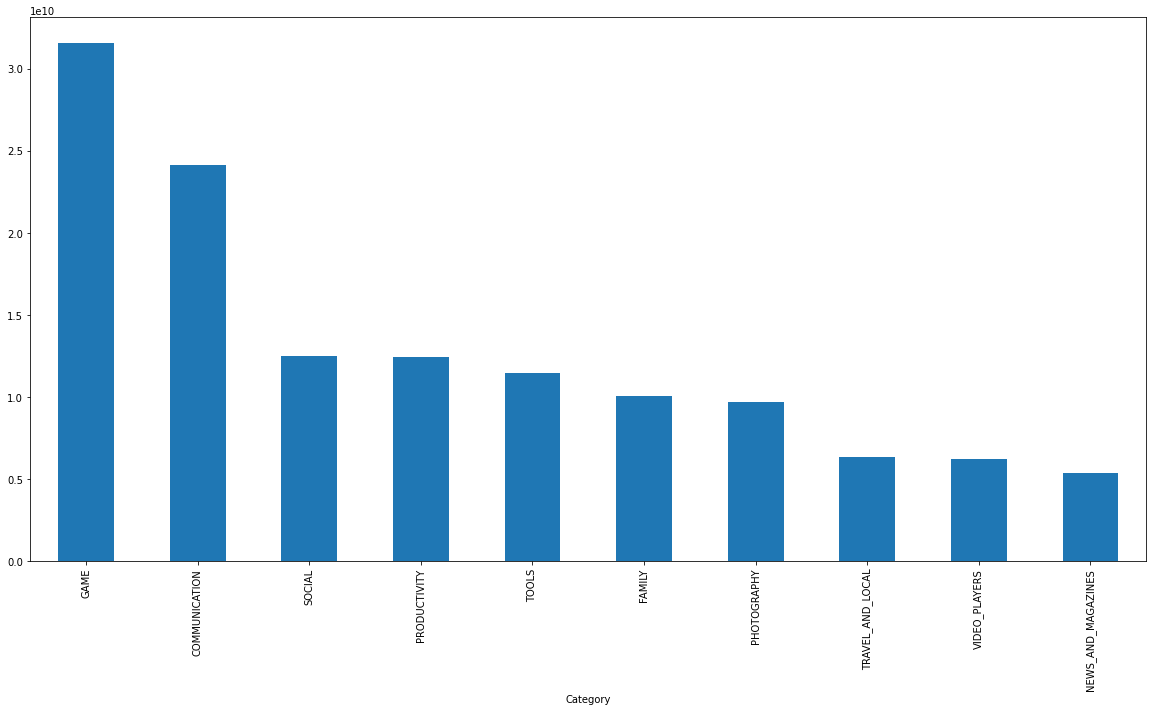

In [81]:
larg_inst[:10].plot(kind = "bar",figsize = (20,10))

In [78]:
df1.groupby('Category')['Installs'].sum().nlargest(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452771915
FAMILY                10041692505
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

<AxesSubplot:ylabel='Installs'>

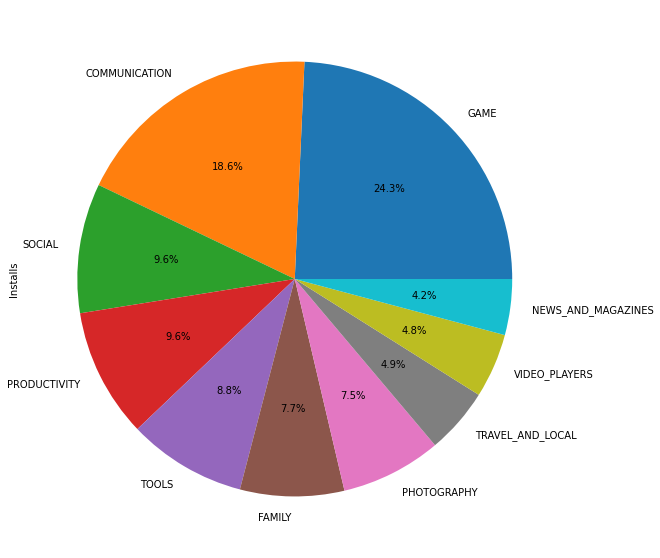

In [83]:
df1.groupby('Category')['Installs'].sum().nlargest(10).plot.pie(figsize = (10,10),autopct = '%1.1f%%')

## Q6. How many apps are there on google play store which get 5 ratings?

In [113]:
df1[df1['Rating'] == 5]['App'].unique()

array(['Hojiboy Tojiboyev Life Hacks', 'American Girls Mobile Numbers',
       'Awake Dating', 'Spine- The dating app',
       'Girls Live Talk - Free Text and Video Chat',
       'Online Girls Chat Group', 'Speeding Joyride & Car Meet App',
       'SUMMER SONIC app', 'Prosperity', 'Mindvalley U Tallinn 2018',
       'Eternal life', 'Super Hearing Secret Voices Recorder PRO',
       'FHR 5-Tier 2.0', 'Sway Medical', 'Labs on Demand',
       'Dermatology Atlas (Colored & Illustrative)', 'Tablet Reminder',
       'Galaxies of Hope', 'KBA-EZ Health Guide', 'FoothillsVet',
       'PrimeDelivery', "You're an Anime",
       'Anatomy & Physiology Vocabulary Exam Review App',
       'NCLEX Multi-topic Nursing Exam Review-Quiz & notes',
       'Basics of Orthopaedics', 'Clinic Doctor EHr',
       '420 BZ Budeze Delivery', 'BP Journal - Blood Pressure Diary',
       'Zen Leaf', 'ADS-B Driver', 'P-Home for KLWP',
       'Android P Style Icon Pack', 'R Programing Offline Tutorial',
       'Easy Ho

In [114]:
len(df1[df1['Rating'] == 5]['App'].unique())

271

## Q7. Does size of the application has any impact on the popularity ?

In [120]:
df1['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10835    53.0
10836     3.6
10837     9.5
10838     NaN
10839    19.0
Name: Size, Length: 10357, dtype: float64

## Q8. Which kind of app user are downloading the most free / paid ?

<AxesSubplot:ylabel='Type'>

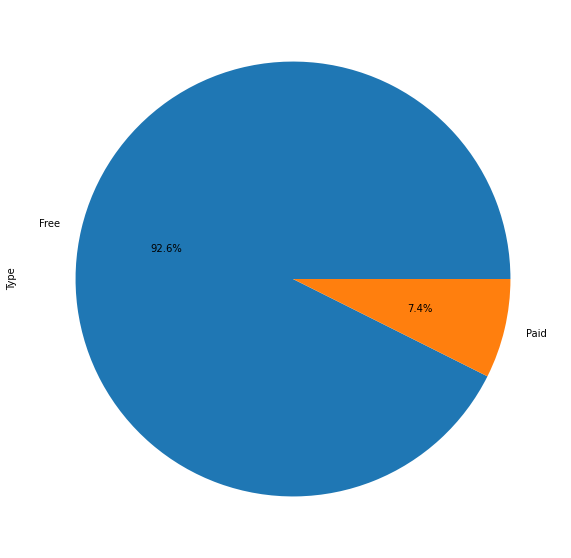

In [27]:
cat_df['Type'].value_counts().plot.pie(figsize = (10,10), autopct = '%1.1f%%')

In [28]:
# Linear Regression
num_df.head()
# you need to create a model (linear regression) where all the features except rating will be independent feature and rating will be a dependent feature

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018
